# Lab NO: 2 (Muhammad Taha Amer)

### Scraping + Feature Engineering + EDA

# Why python?
### !pip install requests beautifulsoup4 lxml pandas spacy matplotlib seaborn textblob !python -m spacy downloa`d en_core_web_sm !pip install seaborn !pip install textblob

In [8]:
import numpy as np
import time

# Generate a large array of random numbers
size = 10000000
data = np.random.rand(size)

# NumPy vectorized sum
start_np = time.time()
np_sum = np.sum(data)
end_np = time.time()

# Manual Python loop sum
start_py = time.time()
manual_sum = 0
for val in data:
    manual_sum += val
end_py = time.time()

# Print results
print(f"NumPy Sum: {np_sum:.2f} | Time: {end_np - start_np:.5f} sec")
print(f"Manual Sum: {manual_sum:.2f} | Time: {end_py - start_py:.5f} sec")

NumPy Sum: 5000912.22 | Time: 0.01237 sec
Manual Sum: 5000912.22 | Time: 3.79478 sec


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

urls = [
    'https://techncruncher.blogspot.com/2025/01/top-10-ai-tools-that-will-transform.html',
    'https://techncruncher.blogspot.com/2023/12/limewire-ai-studio-review-2023-details.html',
    'https://techncruncher.blogspot.com/2023/01/top-10-ai-tools-in-2023-that-will-make.html',
    'https://techncruncher.blogspot.com/2022/11/top-10-ai-content-generator-writer.html',
    'https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html'
]

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
articles = []

for url in urls:
    try:
        res = requests.get(url, headers=headers, timeout=10)
        res.raise_for_status()
        soup = BeautifulSoup(res.content, 'lxml')

        title = soup.find('h3', class_='post-title')
        title = title.get_text(strip=True) if title else soup.title.get_text(strip=True)

        content_div = soup.find('div', class_='post-body entry-content')
        if not content_div:
            print(f"[SKIP] No content: {url}")
            continue

        paragraphs = content_div.find_all('p')
        text = ' '.join(p.get_text(strip=True) for p in paragraphs)

        if len(text) > 100:
            articles.append({'url': url, 'title': title, 'text': text})
        else:
            print(f"[SKIP] Too short: {url}")

        time.sleep(1)
    except Exception as e:
        print(f"[ERROR] {url} -> {e}")

df = pd.DataFrame(articles)
df.head()

[SKIP] Too short: https://techncruncher.blogspot.com/2022/09/cj-affiliate-ultimate-guide-to.html


,url,title,text
0,https://techncruncher.blogspot.com/2025/01/top...,Top 10 AI Tools That Will Transform Your Conte...,Looking to level up your content creation gam...
1,https://techncruncher.blogspot.com/2023/12/lim...,"LimeWire AI Studio Review 2023: Details, Prici...",In the rapidly advancing landscape of AI tech...
2,https://techncruncher.blogspot.com/2023/01/top...,Top 10 AI Tools in 2023 That Will Make Your Li...,"In this article, we explore the top 10 AI too..."
3,https://techncruncher.blogspot.com/2022/11/top...,Top 10 AI Content Generator & Writer Tools in ...,There are a number of different AI content ...


In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    return pd.Series({
        'num_tokens': len(doc),
        'num_sentences': len(list(doc.sents)),
        'num_entities': len(doc.ents),
        'num_nouns': len([t for t in doc if t.pos_ == 'NOUN'])
    })

if not df.empty:
    features = df['text'].apply(extract_features)
    df = pd.concat([df, features], axis=1)
    df['title_length'] = df['title'].apply(len)
else:
    print("⚠️ No articles found.")


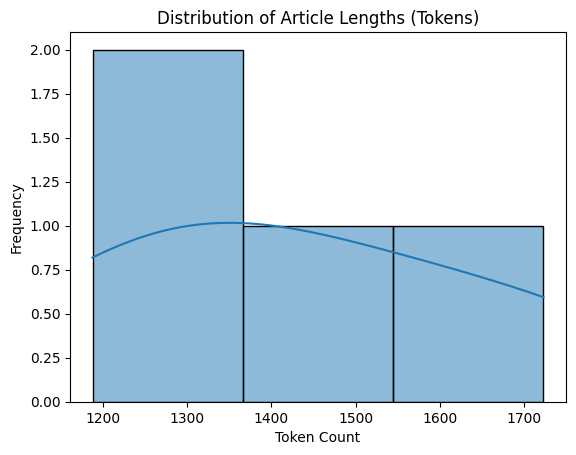

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    sns.histplot(df['num_tokens'], kde=True)
    plt.title("Distribution of Article Lengths (Tokens)")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.show()

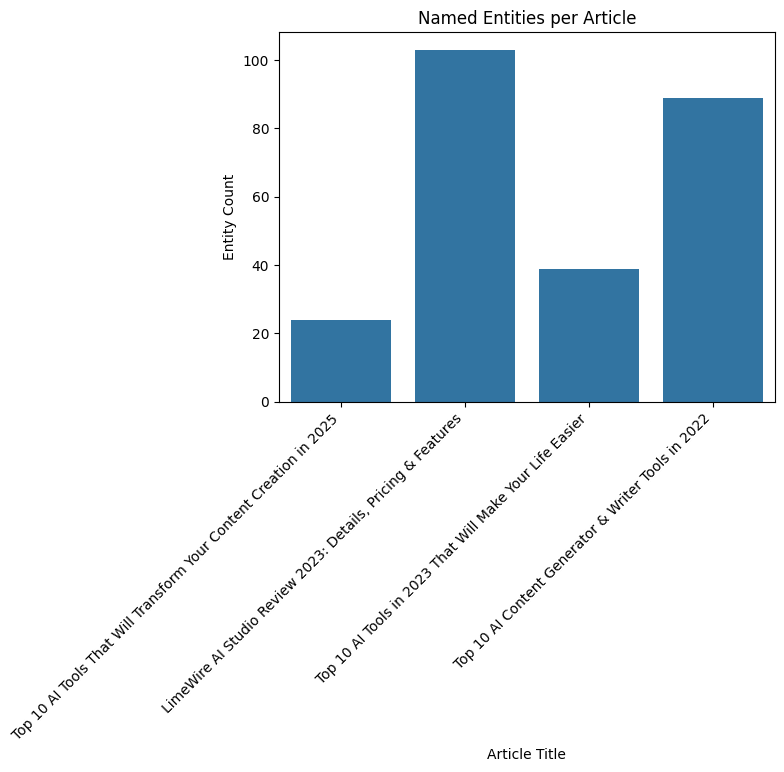

In [4]:
if not df.empty:
    sns.barplot(x='title', y='num_entities', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Named Entities per Article")
    plt.ylabel("Entity Count")
    plt.xlabel("Article Title")
    plt.show()

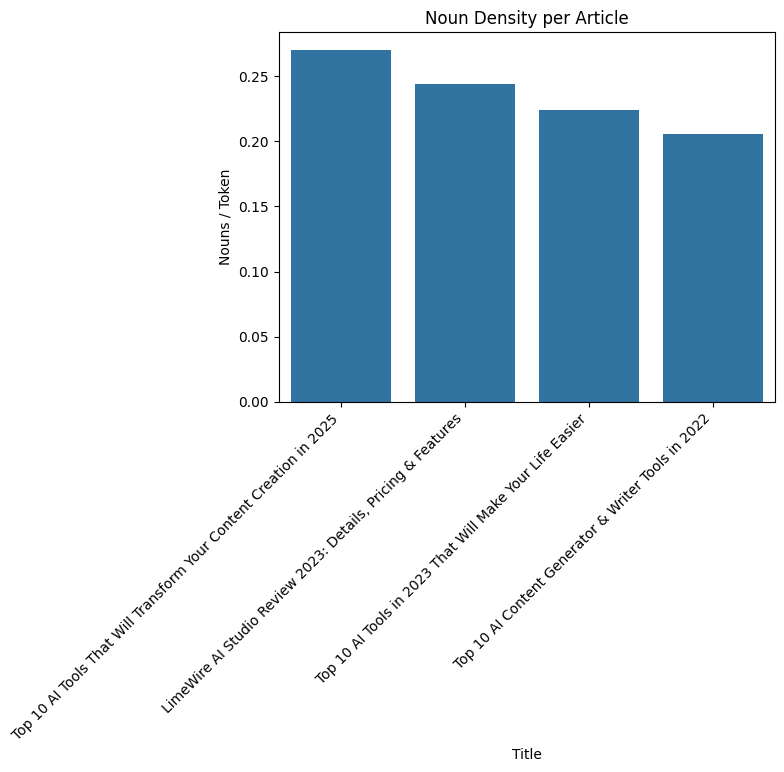

In [5]:
if not df.empty:
    df['noun_density'] = df['num_nouns'] / df['num_tokens']
    sns.barplot(x='title', y='noun_density', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Noun Density per Article")
    plt.ylabel("Nouns / Token")
    plt.xlabel("Title")
    plt.show()

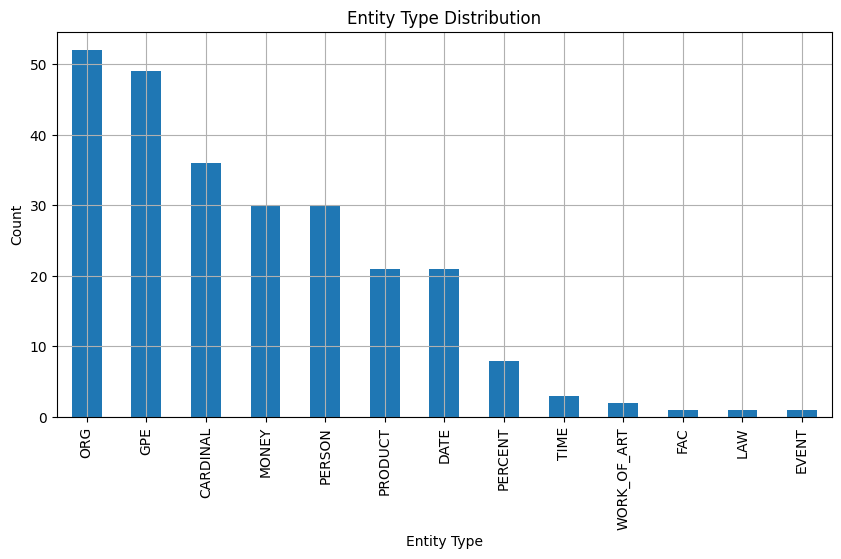

In [6]:
from collections import Counter

all_entities = []
for text in df['text']:
    doc = nlp(text)
    all_entities.extend([ent.label_ for ent in doc.ents])

entity_counts = Counter(all_entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count']).sort_values('count', ascending=False)

if not entity_df.empty:
    entity_df.plot(kind='bar', figsize=(10,5), legend=False)
    plt.title("Entity Type Distribution")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")
    plt.grid(True)
    plt.show()

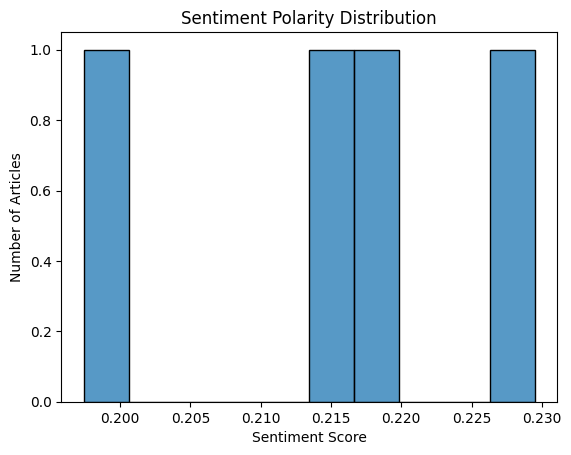

In [7]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df['sentiment'], bins=10)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()

In [8]:
df[['title', 'title_length', 'num_tokens', 'num_sentences', 'num_entities', 'num_nouns', 'noun_density', 'sentiment']]

,title,title_length,num_tokens,num_sentences,num_entities,num_nouns,noun_density,sentiment
0,Top 10 AI Tools That Will Transform Your Conte...,65,1188,47,24,321,0.270202,0.229493
1,"LimeWire AI Studio Review 2023: Details, Prici...",59,1723,65,103,420,0.243761,0.219387
2,Top 10 AI Tools in 2023 That Will Make Your Li...,55,1480,52,39,331,0.223649,0.197417
3,Top 10 AI Content Generator & Writer Tools in ...,50,1319,63,89,271,0.205459,0.214853


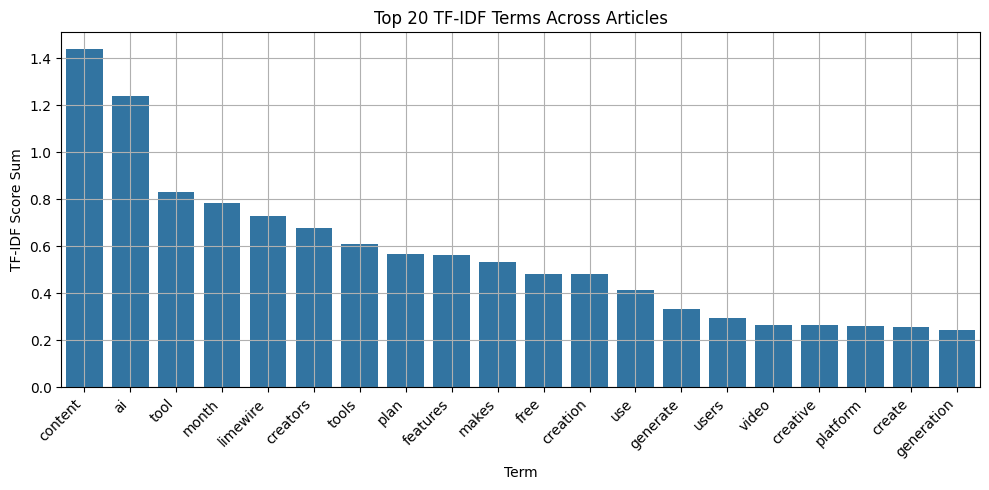

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit to top 20 terms for display
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

X = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show top TF-IDF features across all documents
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms Across Articles")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()